In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych

In [2]:
PATH = './Data/'
filenames = ['Client_cancellations.csv', 
             'Future_bookings.csv',
             'Hair_salon_no_show_wrangled.csv',
             'No_show_report.csv',
             'Product_listing.csv',
             'Receipt_transactions.csv',
             'Service_listing.csv',
            ]

In [3]:
data = [pd.read_csv(PATH + filename) for filename in filenames]

## Podstawowe informacje o danych

In [40]:
#cancelation list
#nazwy kolumn : 
# Cancel Date - data odwołania
# Code - kod klienta
# Service - rodzaj usługi 
# Staff - osoba wykonująca usługę
# Canceled by - przez kogo odwołane
# Days - Ilość dni od dnia rezerwacji do odwołania 
data[0].info()
data[0].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
Cancel Date     243 non-null object
Code            243 non-null object
Service         243 non-null object
Staff           243 non-null object
Booking Date    243 non-null object
Canceled By     243 non-null object
Days            241 non-null float64
dtypes: float64(1), object(6)
memory usage: 13.4+ KB


,Cancel Date,Code,Service,Staff,Booking Date,Canceled By,Days
0,05/22/2018,MASA01,CFC,JOANNE,05/24/2018,ADMIN,2.0
1,06/27/2018,MASA01,CBAL,KELLY,06/27/2018,ADMIN,0.0
2,07/03/2018,MASA01,SHCM,BECKY,07/10/2018,BECKY,7.0
3,07/10/2018,MASA01,SHCC,JJ,07/11/2018,KELLY,1.0
4,07/24/2018,TRUA01,SHCM,KELLY,07/24/2018,TANYA,0.0


In [41]:
#Future bookings
#nazwy kolumn : 
# Code - kod klienta
# Staff - osoba wykonująca usługę
# Service - rodzaj usługi 
# Date - data rezerwacji
# Time - godzina rezerwacji
# Timeint - nieużywana zmienna 
data[1].info()
data[1].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 6 columns):
Code       1905 non-null object
Staff      1906 non-null object
Service    1906 non-null object
Date       1906 non-null object
Time       1906 non-null object
TimeInt    1906 non-null int64
dtypes: int64(1), object(5)
memory usage: 89.4+ KB


,Code,Staff,Service,Date,Time,TimeInt
0,JUNJ01,JJ,CON,03/14/2018,3:50:00 PM,950
1,NORJ01,JJ,SHCM,03/14/2018,4:00:00 PM,960
2,CORS01,JJ,SHCW,03/15/2018,2:10:00 PM,850
3,KERT01,JJ,SHCW,03/15/2018,10:00:00 AM,600
4,LEHJ01,JJ,SHCM,03/15/2018,6:00:00 PM,1080


In [42]:
#no show wrangled
# nazwy cech:
# unnamed/booking index - ID
# book_tod - pora dnia rezerwcji
# book_dow - dzień rezerwacji
# book_category - kategoria rezerwacji
# book_staff - osoba do której zapisuje się kient
# last_category - ostatnia wykonana usługa na kliencie
# last_staff - ostatnia osoba, która wykonywała usługę
# last_day_services - ilość usług wykonana dla klienta podczas jego ostaniej wizyty
# last_receipt_tot - rachunek zapłacony przez klienta podczas ostaniej wizyty
# last_dow - dzień tygodnia poprzedniej rezerwacji
# last_tod - pora dnia ostaniej rezerwacji
# last_noshow - czy klient nie pojawił się podczas ostaniej rezerwacji
# last_prod_flag - czy klient kupił jakiś produkt podczas ostatniej wizyty
# last_cumrev - łączna cena wysztkich dotychczasowych usług klienta w salonie
# last_cumbook - łączna ilość rezerwacji wykoana przez klienta
# last_cumstyle - łączna ilość usług STYLE klienta w salonie
# last_cumcolor - łączna ilość usług COLOR klienat w salonie
# last_cumprod - łączna ilośc rezerwacji, podczas których klient kupił jakiś produkt
# last_cumcancel - łączna ilość odołanych rezerwacji przez klienta
# last_cumnoshow - łączna ilość nie pojawień się 
# noshow - czy klient nie pojawił się lub odwołał rezerwację
# recency - ilość dni od ostaniej rezerwacji klienta
data[2].info()
data[2].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 22 columns):
Unnamed: 0           1952 non-null int64
book_tod             1717 non-null object
book_dow             1952 non-null object
book_category        1952 non-null object
book_staff           1952 non-null object
last_category        1003 non-null object
last_staff           1003 non-null object
last_day_services    1952 non-null int64
last_receipt_tot     1952 non-null float64
last_dow             1003 non-null object
last_tod             858 non-null object
last_noshow          1952 non-null int64
last_prod_flag       1952 non-null int64
last_cumrev          1952 non-null int64
last_cumbook         1952 non-null int64
last_cumstyle        1952 non-null int64
last_cumcolor        1952 non-null int64
last_cumprod         1952 non-null int64
last_cumcancel       1952 non-null int64
last_cumnoshow       1952 non-null int64
noshow               1952 non-null int64
recency              19

,Unnamed: 0,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,0,afternoon,Wednesday,STYLE,JJ,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,morning,Wednesday,COLOR,JOANNE,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,NaN,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,...,1,262,2,1,1,2,0,0,0,35
3,3,afternoon,Thursday,STYLE,KELLY,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,...,0,35,1,1,0,0,0,0,0,9


In [43]:
#no show report
#lista cech:
# Date - data
# Code - kod klienta
# Service - rodzaj usługi
# Staff - osoba wykonująca usługę
data[3].info()
data[3].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
Date       60 non-null object
Code       59 non-null object
Service    60 non-null object
Staff      60 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


,Date,Code,Service,Staff
0,04/13/2018,NaN,SHCW,JJ
1,07/27/2018,AMAB01,SHCM,KELLY
2,06/07/2018,APPS01,SBD,KELLY
3,06/05/2018,ASIS01,SHCW,KELLY
4,05/31/2018,BISD01,CON,SINEAD


In [44]:
#Product listing
#nazwy cech:
# IsActive - czy produkt jest dostępny/aktywny
# Code - kod produktu
# Description - opis
# Supplier - dostawca 
# Brand - marka produktu
# Category - kategoria produktu
# Price - cena produktu
# On Hand - ilość sztuk produktu dostępnych w salonie
# Minimum - Unused
# Maximim - Unused
# Cost - koszt jednostkowy produktu
# COG - całkowity koszt produktu
# YTD - YTD sales????
# Package - Unused
data[4].info()
data[4].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
IsActive       101 non-null bool
Code           101 non-null object
Description    100 non-null object
Supplier       98 non-null object
Brand          98 non-null object
Category       99 non-null object
Price          101 non-null float64
On Hand        101 non-null int64
Minimum        101 non-null int64
Maximum        101 non-null int64
Cost           101 non-null float64
COG            101 non-null float64
YTD            101 non-null float64
Package        101 non-null bool
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 9.7+ KB


,IsActive,Code,Description,Supplier,Brand,Category,Price,On Hand,Minimum,Maximum,Cost,COG,YTD,Package
0,True,AGBALANCE335M,AG balance 355ml,VENUS,AG,RETAIL,30.0,2,2,2,0.0,0.0,27.0,False
1,True,AGBOOST355ML,AG Boost 355ml,VENUS,AG,RETAIL,30.0,3,2,2,18.0,54.0,0.0,False
2,True,AGCLOUD107ML,AG Cloud 107ml,VENUS,AG,RETAIL,26.0,4,2,2,15.6,62.4,23.4,False
3,True,AGDRYLIFT44ML,AG Dry Lift 44ml,VENUS,AG,RETAIL,24.0,1,2,2,14.4,14.4,43.2,False
4,True,AGREMEDY148ML,AG Remedy 148ml,VENUS,AG,RETAIL,26.0,3,2,2,15.6,46.8,0.0,False


In [45]:
#Recipt transactions
#nazwy cech:
# Recipt - numer zamówienia
# Date - data transakcji
# Description - opis
# Client - id klienta
# Staff - osoba wykonująca usługę
# Quantity - ilość zamówionych usług/sprzedanych dóbr
# Amount - koszt całkowity usługi
# GST - podatek federalny
# PST - podatek lokalny
data[5].info()
data[5].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 9 columns):
Receipt        1934 non-null int64
Date           1934 non-null object
Description    1931 non-null object
Client         1934 non-null object
Staff          1934 non-null object
Quantity       1934 non-null int64
Amount         1934 non-null float64
GST            1934 non-null float64
PST            1934 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 136.1+ KB


,Receipt,Date,Description,Client,Staff,Quantity,Amount,GST,PST
0,10,03/15/2018,Women's hair cut,KERT01,JJ,1,82.0,4.10,6.56
1,100,04/05/2018,Women's hair cut,COOM01,SINEAD,1,70.0,3.50,5.60
2,1000,06/09/2018,Consultation,PEDM01,JJ,1,0.0,0.00,0.00
3,1001,06/09/2018,Women's hair cut,BAIS01,KELLY,1,55.0,2.75,4.40
4,1003,06/09/2018,Women's hair cut,FRAL01,KELLY,1,65.0,3.25,5.20


In [46]:
#Service listing
# nazwy cech:
# IsActive - czy usługa jest dostępna
# Code - kod usługi
# Desc - opis usługi
# Cate - categoria usługi
# price - cena za usługę(ceny mogą się różnić w zależności od osoby wykonującej usługę)
# cost - koszt poniesiony przez pracowników za produkty 
data[6].info()
data[6].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
IsActive    33 non-null bool
Code        33 non-null object
Desc        32 non-null object
Cate        33 non-null object
Price       33 non-null int64
Cost        33 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 1.4+ KB


,IsActive,Code,Desc,Cate,Price,Cost
0,True,CAL,accent lights,COLOR,0,10
1,True,CALC,Accent lights and color,COLOR,0,10
2,True,CAS,Color additional service,COLOR,0,10
3,True,CBAL,Balayage,COLOR,0,10
4,True,CCAMO,Men's camo color,COLOR,45,5


## Praca z plikiem zbiorczym

In [4]:
df = data[2].copy()

In [5]:
df.head()

,Unnamed: 0,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,0,afternoon,Wednesday,STYLE,JJ,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,morning,Wednesday,COLOR,JOANNE,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,NaN,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,...,1,262,2,1,1,2,0,0,0,35
3,3,afternoon,Thursday,STYLE,KELLY,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,...,0,35,1,1,0,0,0,0,0,9


## Funkcje

In [6]:
def preprocess_categorical(col_name, how_na=-1, cols={}):
    
    print(cols)
    if df[col_name].isna().sum() != 0:
        series = df[col_name].fillna(how_na).replace(cols).astype('int64')
    else:
        series = df[col_name].replace(cols).astype('int64')
  
    return series
    

In [21]:
def plot_countplot(df, col, hue=None, title=None, xlabel=None, ylabel='count'):
        sns.set_style('whitegrid')
        if hue != None:
            print(df.groupby(col)[hue].value_counts().sort_index())
        else:
            print(df[col].value_counts().sort_index())
        plt.figure(figsize=(10,5))
        ax = sns.countplot(data=df, x=col, hue=hue)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel, rotation=0)
        plt.title(title)
        plt.show()

## Podział zbiru na nowych i stałych klientów

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 22 columns):
Unnamed: 0           1952 non-null int64
book_tod             1717 non-null object
book_dow             1952 non-null object
book_category        1952 non-null object
book_staff           1952 non-null object
last_category        1003 non-null object
last_staff           1003 non-null object
last_day_services    1952 non-null int64
last_receipt_tot     1952 non-null float64
last_dow             1003 non-null object
last_tod             858 non-null object
last_noshow          1952 non-null int64
last_prod_flag       1952 non-null int64
last_cumrev          1952 non-null int64
last_cumbook         1952 non-null int64
last_cumstyle        1952 non-null int64
last_cumcolor        1952 non-null int64
last_cumprod         1952 non-null int64
last_cumcancel       1952 non-null int64
last_cumnoshow       1952 non-null int64
noshow               1952 non-null int64
recency              19

In [8]:
is_first_time = df['last_cumbook'] == 0
new_client = df[is_first_time]
old_client = df[~is_first_time]

data = [df, new_client, old_client]

In [9]:
new_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1947
Data columns (total 22 columns):
Unnamed: 0           949 non-null int64
book_tod             876 non-null object
book_dow             949 non-null object
book_category        949 non-null object
book_staff           949 non-null object
last_category        0 non-null object
last_staff           0 non-null object
last_day_services    949 non-null int64
last_receipt_tot     949 non-null float64
last_dow             0 non-null object
last_tod             0 non-null object
last_noshow          949 non-null int64
last_prod_flag       949 non-null int64
last_cumrev          949 non-null int64
last_cumbook         949 non-null int64
last_cumstyle        949 non-null int64
last_cumcolor        949 non-null int64
last_cumprod         949 non-null int64
last_cumcancel       949 non-null int64
last_cumnoshow       949 non-null int64
noshow               949 non-null int64
recency              949 non-null int64
dtypes: floa

In [10]:
old_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 2 to 1951
Data columns (total 22 columns):
Unnamed: 0           1003 non-null int64
book_tod             841 non-null object
book_dow             1003 non-null object
book_category        1003 non-null object
book_staff           1003 non-null object
last_category        1003 non-null object
last_staff           1003 non-null object
last_day_services    1003 non-null int64
last_receipt_tot     1003 non-null float64
last_dow             1003 non-null object
last_tod             858 non-null object
last_noshow          1003 non-null int64
last_prod_flag       1003 non-null int64
last_cumrev          1003 non-null int64
last_cumbook         1003 non-null int64
last_cumstyle        1003 non-null int64
last_cumcolor        1003 non-null int64
last_cumprod         1003 non-null int64
last_cumcancel       1003 non-null int64
last_cumnoshow       1003 non-null int64
noshow               1003 non-null int64
recency              100

## EDA

### Analiza zmiennej docelowej dla zmiennych kategorialnych

0    1728
1     224
Name: noshow, dtype: int64


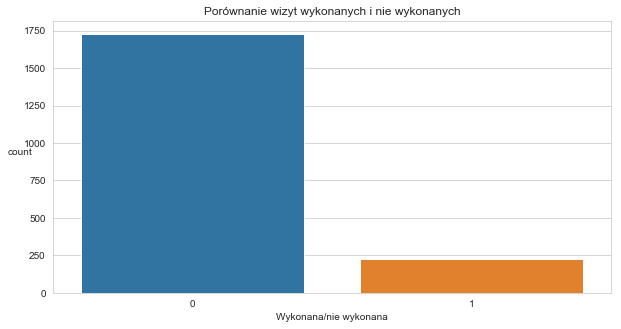

0    866
1     83
Name: noshow, dtype: int64


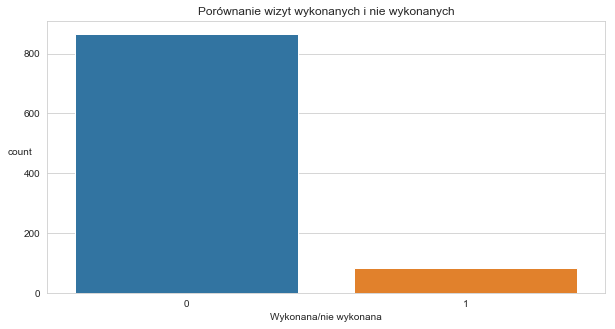

0    862
1    141
Name: noshow, dtype: int64


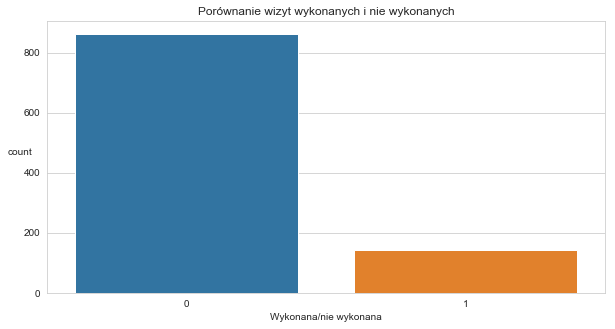

In [22]:
for frame in data:
    plot_countplot(frame, 
                   'noshow', 
                   title='Porównanie wizyt wykonanych i nie wykonanych', 
                   xlabel='Wykonana/nie wykonana')

noshow  book_dow 
0       Friday       359
        Monday         1
        Saturday     353
        Sunday        40
        Thursday     371
        Tuesday      350
        Wednesday    254
1       Friday        46
        Saturday      40
        Sunday        14
        Thursday      46
        Tuesday       41
        Wednesday     37
Name: book_dow, dtype: int64


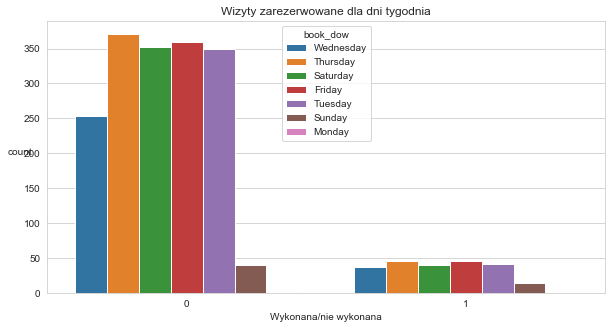

noshow  book_dow 
0       Friday       160
        Monday         1
        Saturday     192
        Sunday        19
        Thursday     181
        Tuesday      176
        Wednesday    137
1       Friday        17
        Saturday      12
        Sunday         8
        Thursday      19
        Tuesday       14
        Wednesday     13
Name: book_dow, dtype: int64


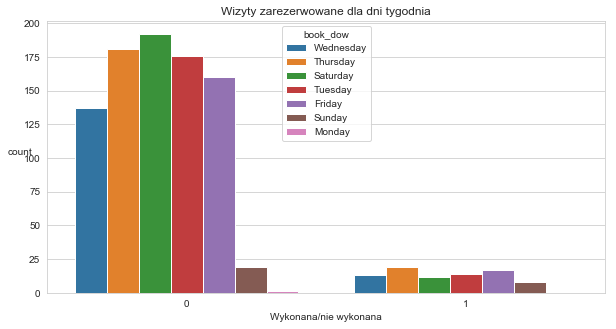

noshow  book_dow 
0       Friday       199
        Saturday     161
        Sunday        21
        Thursday     190
        Tuesday      174
        Wednesday    117
1       Friday        29
        Saturday      28
        Sunday         6
        Thursday      27
        Tuesday       27
        Wednesday     24
Name: book_dow, dtype: int64


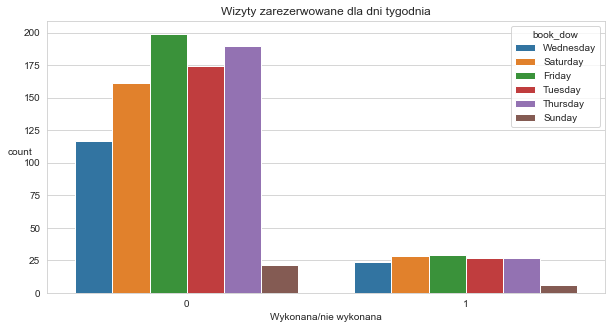

In [23]:
for frame in data:
    plot_countplot(frame,
                   'noshow',
                   hue='book_dow', 
                   title='Wizyty zarezerwowane dla dni tygodnia', 
                   xlabel='Wykonana/nie wykonana')

noshow  book_tod 
0       afternoon    682
        evening      409
        morning      517
1       afternoon     53
        evening       25
        morning       31
Name: book_tod, dtype: int64


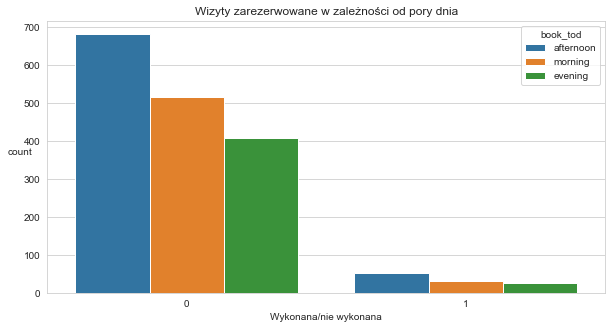

noshow  book_tod 
0       afternoon    374
        evening      221
        morning      251
1       afternoon     19
        evening        7
        morning        4
Name: book_tod, dtype: int64


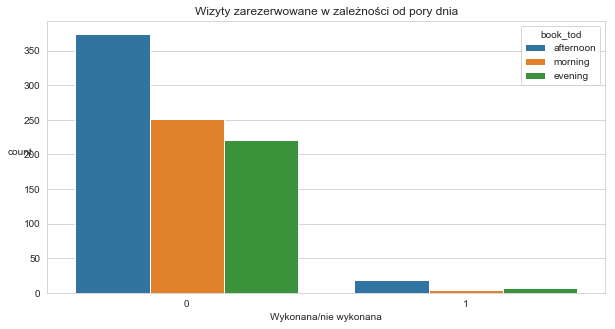

noshow  book_tod 
0       afternoon    308
        evening      188
        morning      266
1       afternoon     34
        evening       18
        morning       27
Name: book_tod, dtype: int64


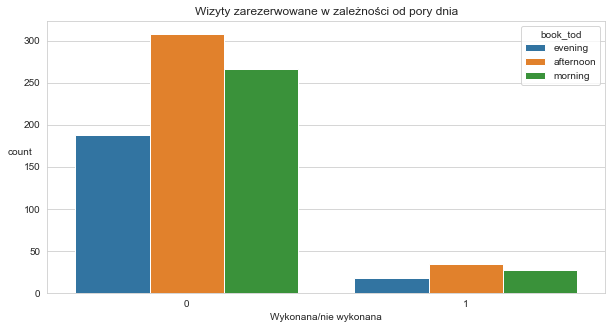

In [24]:
for frame in data:
    plot_countplot(frame,
                   'noshow',
                   hue='book_tod',
                   title='Wizyty zarezerwowane w zależności od pory dnia', 
                   xlabel='Wykonana/nie wykonana')

noshow  book_staff
0       BECKY         368
        HOUSE          19
        JJ            653
        JOANNE        235
        KELLY         267
        SINEAD        172
        TANYA          14
1       BECKY          68
        HOUSE           1
        JJ             69
        JOANNE         25
        KELLY          34
        SINEAD         24
        TANYA           3
Name: book_staff, dtype: int64


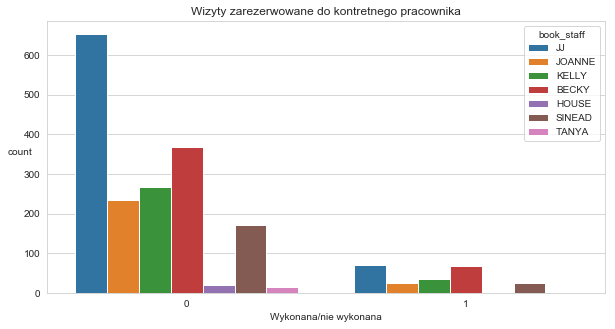

noshow  book_staff
0       BECKY         163
        HOUSE           3
        JJ            307
        JOANNE         84
        KELLY         193
        SINEAD        106
        TANYA          10
1       BECKY          16
        HOUSE           1
        JJ             28
        JOANNE         12
        KELLY          21
        SINEAD          4
        TANYA           1
Name: book_staff, dtype: int64


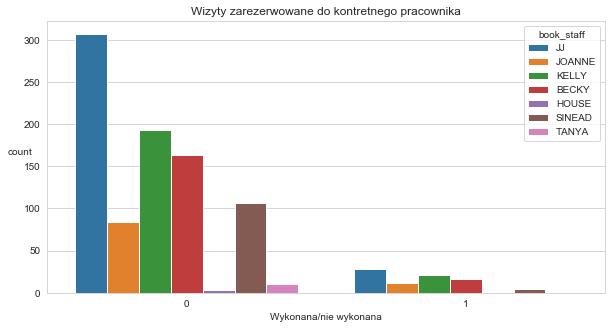

noshow  book_staff
0       BECKY         205
        HOUSE          16
        JJ            346
        JOANNE        151
        KELLY          74
        SINEAD         66
        TANYA           4
1       BECKY          52
        JJ             41
        JOANNE         13
        KELLY          13
        SINEAD         20
        TANYA           2
Name: book_staff, dtype: int64


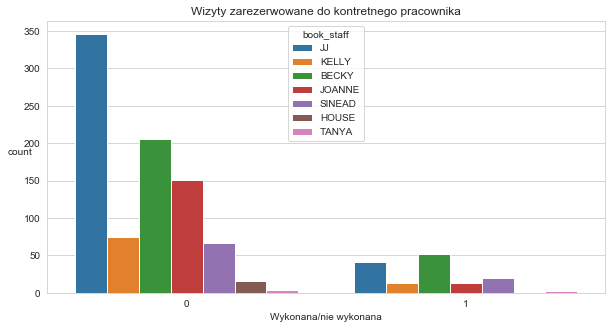

In [25]:
for frame in data:
    plot_countplot(frame, 
               'noshow', 
               hue='book_staff', 
               title='Wizyty zarezerwowane do kontretnego pracownika',
               xlabel='Wykonana/nie wykonana')

noshow  last_staff
0       BECKY         180
        HOUSE           7
        JJ            320
        JOANNE        151
        KELLY          83
        SINEAD        117
        TANYA           4
1       BECKY          48
        HOUSE           9
        JJ             35
        JOANNE         18
        KELLY          14
        SINEAD         17
Name: last_staff, dtype: int64


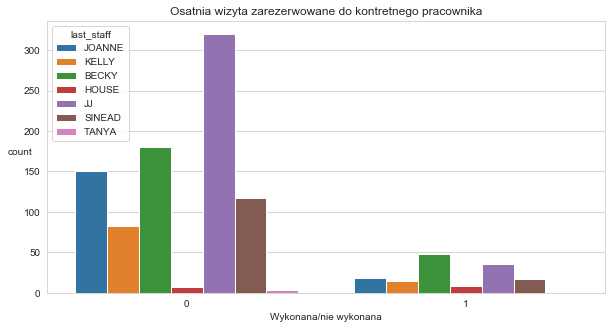

In [26]:
plot_countplot(old_client, 
               'noshow', 
               hue='last_staff', 
               title='Osatnia wizyta zarezerwowane do kontretnego pracownika',
               xlabel='Wykonana/nie wykonana')

noshow  book_category
0       COLOR             304
        MISC               63
        STYLE            1361
1       COLOR              43
        MISC               11
        STYLE             170
Name: book_category, dtype: int64


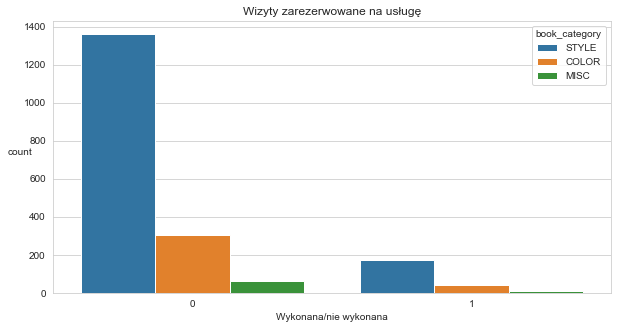

noshow  book_category
0       COLOR            130
        MISC              20
        STYLE            716
1       COLOR             22
        MISC               4
        STYLE             57
Name: book_category, dtype: int64


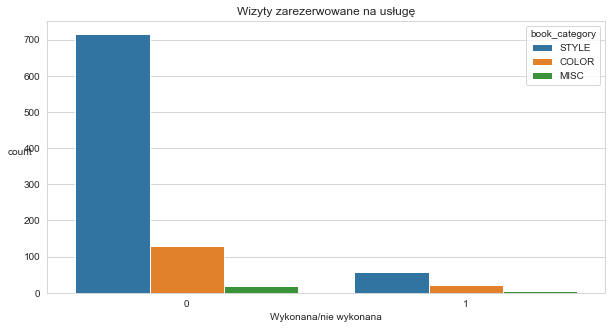

noshow  book_category
0       COLOR            174
        MISC              43
        STYLE            645
1       COLOR             21
        MISC               7
        STYLE            113
Name: book_category, dtype: int64


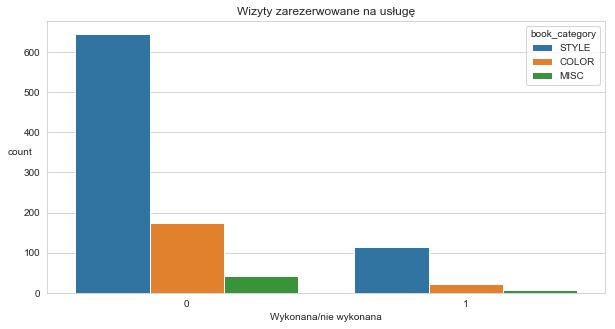

In [27]:
for frame in data:
    plot_countplot(frame, 
               'noshow', 
               hue='book_category', 
               title='Wizyty zarezerwowane na usługę',
               xlabel='Wykonana/nie wykonana')

noshow  last_noshow
0       0              757
        1              105
1       0               97
        1               44
Name: last_noshow, dtype: int64


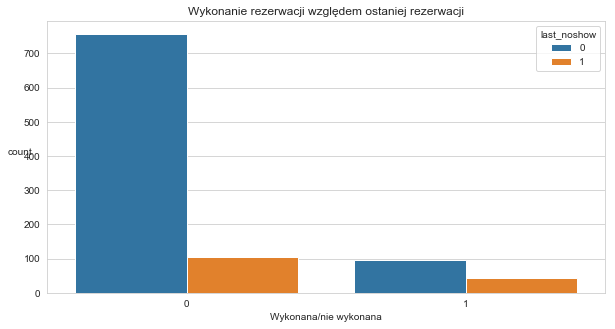

In [28]:
plot_countplot(old_client, 
               'noshow', 
               hue='last_noshow', 
               title='Wykonanie rezerwacji względem ostaniej rezerwacji',
               xlabel='Wykonana/nie wykonana')

noshow  last_cumnoshow
0       0                 673
        1                  63
        2                  41
        3                  27
        4                  11
        5                  24
        6                   4
        7                  14
        8                   3
        9                   2
1       0                  62
        1                  20
        2                  15
        3                  11
        4                   9
        5                   7
        6                   7
        7                   6
        8                   3
        9                   1
Name: last_cumnoshow, dtype: int64


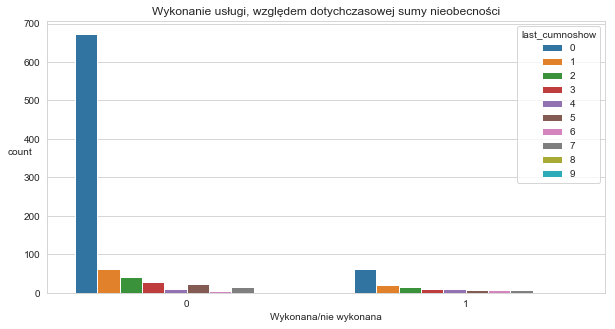

In [29]:
plot_countplot(old_client, 
               'noshow', 
               hue='last_cumnoshow', 
               title='Wykonanie usługi, względem dotychczasowej sumy nieobecności',
               xlabel='Wykonana/nie wykonana')

noshow  last_cumcancel
0       0                 649
        1                 111
        2                  58
        3                  19
        4                   9
        5                   8
        6                   6
        8                   2
1       0                  77
        1                  25
        2                  20
        3                   9
        4                   7
        5                   3
Name: last_cumcancel, dtype: int64


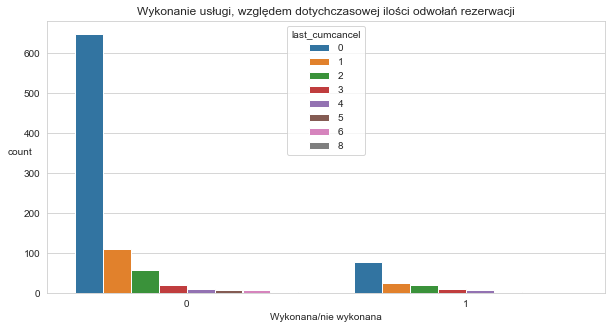

In [30]:
plot_countplot(old_client, 
               'noshow', 
               hue='last_cumcancel', 
               title='Wykonanie usługi, względem dotychczasowej ilości odwołań rezerwacji',
               xlabel='Wykonana/nie wykonana')

last_cumbook  noshow
1             0         306
              1          26
2             0         202
              1          32
3             0         106
              1          15
4             0          66
              1          12
5             0          32
              1          10
6             0          26
              1           7
7             0          26
              1           4
8             0          12
              1           1
9             0          12
              1           7
10            0          12
              1           5
11            0          13
              1           2
12            0           6
              1           5
13            0           7
              1           2
14            0          11
              1           4
15            0          10
              1           3
16            0           5
              1           2
17            0           2
              1           3
18            0           5

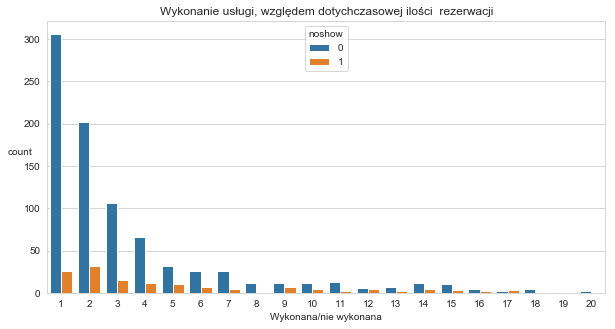

In [31]:
plot_countplot(old_client, 
               'last_cumbook', 
               hue='noshow', 
               title='Wykonanie usługi, względem dotychczasowej ilości  rezerwacji',
               xlabel='Wykonana/nie wykonana')

### Korelogram

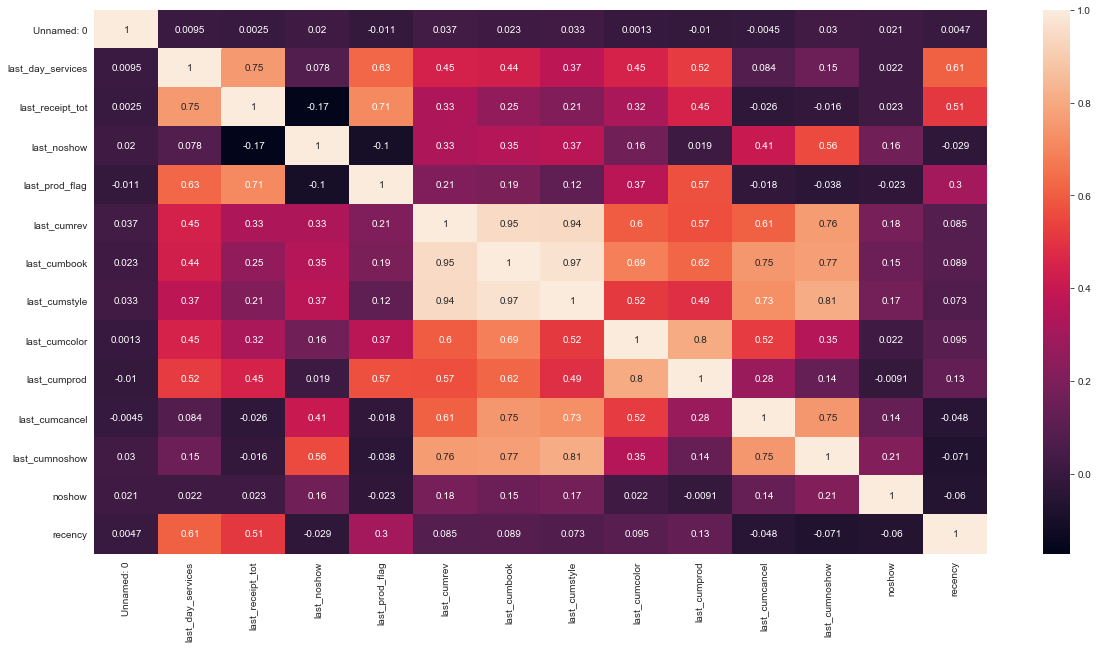

In [255]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

### Zmienne numeryczne

In [242]:
sns.set_style('dark')

In [256]:
old_client['last_receipt_tot'].describe()

count    1003.000000
mean       69.638873
std        67.108317
min         0.000000
25%         0.000000
50%        55.000000
75%        98.300000
max       382.800000
Name: last_receipt_tot, dtype: float64

In [184]:
old_client['last_cumrev'].describe()

count    1003.000000
mean      216.526421
std       247.719467
min         0.000000
25%        60.000000
50%       120.000000
75%       280.000000
max      1276.000000
Name: last_cumrev, dtype: float64

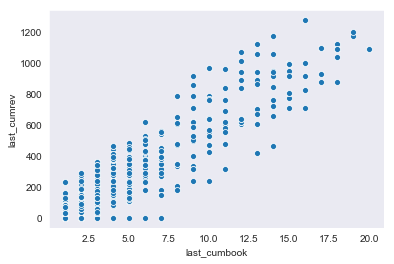

In [243]:
sns.scatterplot(data = old_client, y='last_cumrev', x='last_cumbook');

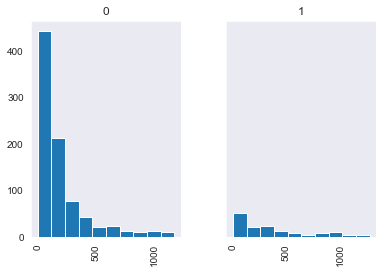

In [244]:
old_client['last_cumrev'].hist(by=old_client['noshow'], sharey=True);

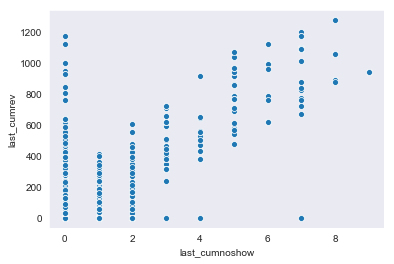

In [245]:
sns.scatterplot(data = old_client, y='last_cumrev', x='last_cumnoshow');

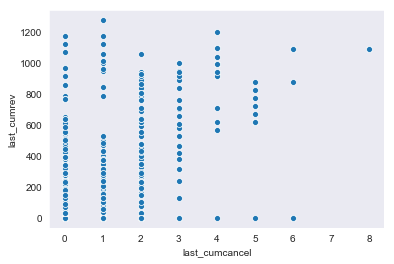

In [246]:
sns.scatterplot(data = old_client, y='last_cumrev', x='last_cumcancel');

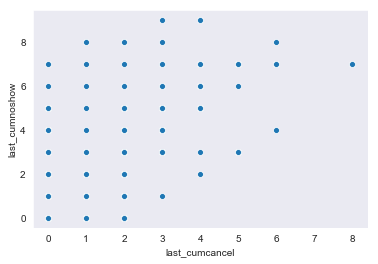

In [247]:
sns.scatterplot(data = old_client, y='last_cumnoshow', x='last_cumcancel');

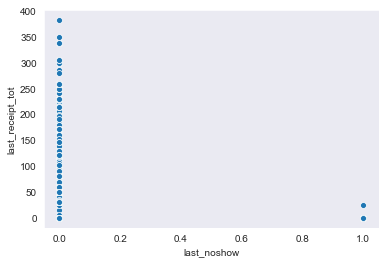

In [248]:
sns.scatterplot(data = old_client, y='last_receipt_tot', x='last_noshow');